<a href="https://colab.research.google.com/github/2303A52451/Gen-AI-2025/blob/main/2303A52451_07_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Dataset Info:
 None

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFuncti

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3240 - loss: 0.7130 - val_accuracy: 0.3442 - val_loss: 0.7096
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3783 - loss: 0.7094 - val_accuracy: 0.3571 - val_loss: 0.7068
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3967 - loss: 0.7076 - val_accuracy: 0.4221 - val_loss: 0.7044
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4058 - loss: 0.7058 - val_accuracy: 0.4351 - val_loss: 0.7021
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4667 - loss: 0.6993 - val_accuracy: 0.4740 - val_loss: 0.7000
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4849 - loss: 0.6994 - val_accuracy: 0.5065 - val_loss: 0.6980
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5254 - loss: 0.6967 - val_accuracy: 0.5325 - val_loss: 0.6961
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5135 - loss: 0.6984 - val_accuracy: 0.5455 - val_loss: 

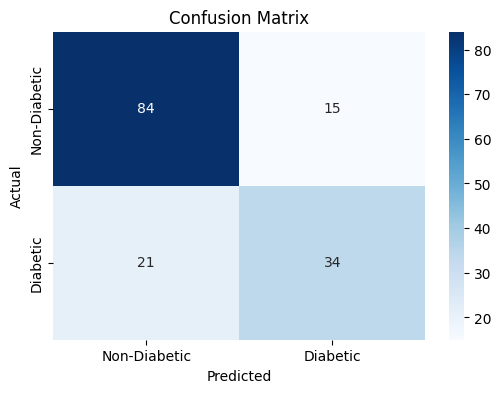

Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Prediction: Diabetic


In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


file_path = "diabetes.xls"
data = pd.read_excel(file_path)
print("Dataset Info:\n", data.info())
print("\nMissing Values:\n", data.isnull().sum())

data.fillna(0, inplace=True)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")

model = Sequential([
    Dense(12, activation="swish", input_shape=(X_train.shape[1],)),
    Dense(25, activation="swish"),
    Dense(15, activation="swish"),
    Dense(1, activation="sigmoid")
])


model.compile(optimizer=Adagrad(), loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"])

print(f"Test Accuracy: {test_accuracy:.4f}")
print(report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

model_filename = "diabetes_ann_model.keras"

if os.path.exists(model_filename):
    os.remove(model_filename)

model.save(model_filename)
print("Model saved successfully!")

def load_trained_model():
    return load_model("diabetes_ann_model.keras"), joblib.load("scaler.pkl")

def predict_diabetes(input_data):
    model, scaler = load_trained_model()
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return "Diabetic" if prediction > 0.5 else "Non-Diabetic"

sample_input = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
result = predict_diabetes(sample_input)
print(f"Prediction: {result}")
